In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
df = pd.read_csv("./data_baru/new_data.csv")
df.head()

,Unnamed: 0,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type,loss_reverse
0,0,15500000.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,DPK,Retired,0.000000e+00
1,1,17500000.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,DPK,Full-time,1.770833e+07
2,2,17500000.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,Lancar,Full-time,0.000000e+00
3,3,15500000.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,DPK,Retired,1.529167e+07
4,4,8700000.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,DPK,Contract,0.000000e+00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5000 non-null   int64  
 1   net_income                  5000 non-null   float64
 2   loan_amount                 5000 non-null   float64
 3   avg_amounts_previous_bills  5000 non-null   float64
 4   avg_previous_payment        5000 non-null   float64
 5   amount_of_late              5000 non-null   float64
 6   late_payment_amount         5000 non-null   float64
 7   credit_score                5000 non-null   float64
 8   arrears_amounts             5000 non-null   float64
 9   aging                       5000 non-null   object 
 10  employment_type             5000 non-null   object 
 11  loss_reverse                5000 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 468.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")
        
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   net_income                  5000 non-null   float64 
 1   loan_amount                 5000 non-null   float64 
 2   avg_amounts_previous_bills  5000 non-null   float64 
 3   avg_previous_payment        5000 non-null   float64 
 4   amount_of_late              5000 non-null   float64 
 5   late_payment_amount         5000 non-null   float64 
 6   credit_score                5000 non-null   float64 
 7   arrears_amounts             5000 non-null   float64 
 8   aging                       5000 non-null   category
 9   employment_type             5000 non-null   category
 10  loss_reverse                5000 non-null   float64 
dtypes: category(2), float64(9)
memory usage: 362.0 KB


In [5]:
aging = {"Lancar": 0, "DPK": 1, "Kurang lancar": 2, "Diragukan": 3, "Macet": 4}
employment_type = {"Not-employed": 0, "Self-employed": 1, "Internship": 2, "Part-time": 3, "Contract": 4, "Full-time": 5, "Retired": 6}
columns = {"aging" : aging, "employment_type": employment_type}

for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

y = df["loss_reverse"]
df.drop("loss_reverse", axis=1, inplace=True)
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type
0,0.000000,0.190476,1.24,1.431472,-0.800000,-0.6,1.589041,-1.0,1,6
1,0.266667,0.984127,-0.88,-0.878173,-0.413333,-0.2,0.365297,0.0,1,5
2,0.266667,-0.111111,-0.04,-0.121827,-0.826667,-0.8,0.835616,-1.0,0,5
3,0.000000,0.063492,-0.28,-0.192893,0.026667,0.2,0.849315,0.0,1,6
4,-0.906667,-0.412698,-0.60,-0.456853,-0.640000,-0.4,0.223744,-1.0,1,4


In [6]:
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 10), (1000, 10), (4000,), (1000,))

In [7]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 220313421180.56
      Mean Absolute Error : 69683.33
      Mean Absolute Percentage Error : 0.00
      Root Mean Squared Error : 0.00
      R_Squared : 1.00
      


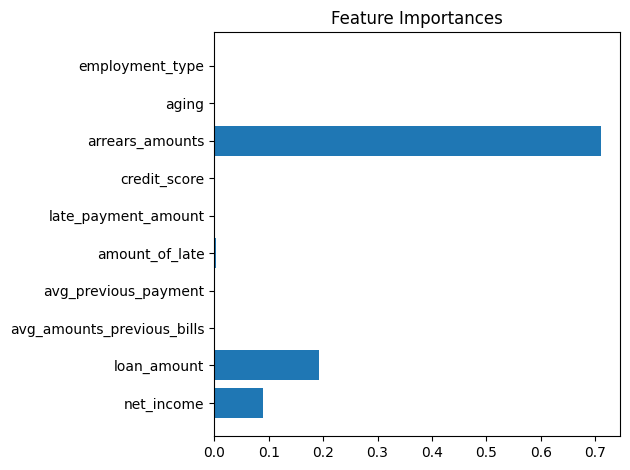

In [9]:
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [11]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
92 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-pa

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [12]:
rf_random.best_score_

0.979983146987871

In [13]:
model = rf_random.best_estimator_

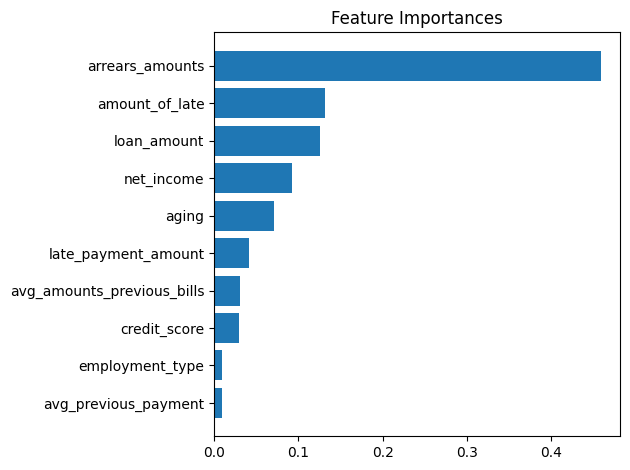

In [14]:
feature = [[i, j] for i, j in zip(X_train.columns, model.feature_importances_)]
feature.sort(key=lambda x:x[1])

plt.barh([i[0] for i in feature], [i[1] for i in feature])
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

In [15]:
y_pred = rf_random.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** (1/2)
r_square = r2_score(y_test, y_pred)

print(f"""
      Mean Squared Errror : {mse:.2f}
      Mean Absolute Error : {mae:.2f}
      Mean Absolute Percentage Error : {mape:.2f}
      Root Mean Squared Error : {mape:.2f}
      R_Squared : {r_square:.2f}
      """)


      Mean Squared Errror : 1684660022203.67
      Mean Absolute Error : 520455.27
      Mean Absolute Percentage Error : 109884547033111789568.00
      Root Mean Squared Error : 109884547033111789568.00
      R_Squared : 0.99
      


In [16]:
import pickle

pickle.dump(model, open("random_forest.pkl", "wb"))

In [17]:
import joblib
load_model = joblib.load('random_forest.pkl')

input_data = [x for x in X_test.iloc[-1]]
final_features = [np.array(input_data)]
result = load_model.predict(final_features)[0]
result

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


12725312.500000006

In [18]:
y_test.iloc[0]

0.0